In [15]:
import numpy as np
import random 
import matplotlib.pyplot as plt

In [16]:
# parametri fisici oscillatore
m = 1.
omega = 1.
#k_B = 1.38065156*10**(-23)
k_B = 1.
T = 10
beta = 1/(k_B*T)

In [17]:
# parametro per far variare r
r_variabile = [0.001*i for i in range(0, 201)]

In [18]:
#r_variabile

In [19]:
def gibbs_distribution_nonlinear(q, p):
    return np.exp(-beta*((p**2)/(2*m) + (m*omega**2)*(q**2)/2 + r*(q**4)/4))

# Definizione della proposta di transizione (scelta semplice per dimostrazione)
def proposal(x, y):
    x_new = x + np.random.normal()
    y_new = y + np.random.normal()
    return x_new, y_new

In [20]:
# Parametri dell'algoritmo di campionamento
num_samples = 100000
burn_in = 5000

In [21]:
viriale_p = []
viriale_q = []
viriale_q_quadro = []
viriale_q_quarto = []

In [22]:
for r in r_variabile:
    
    # Inizializzazione campionamento
    current_q, current_p = 0.0, 0.0
    samples = []
    
    # Ciclo di campionamento delle q e delle p
    for _ in range(num_samples + burn_in):
        proposed_q, proposed_p = proposal(current_q, current_p)
    
        acceptance_ratio = min(1, gibbs_distribution_nonlinear(proposed_q, proposed_p) / gibbs_distribution_nonlinear(current_q, current_p))
    
        if np.random.uniform() < acceptance_ratio:
            current_q, current_p = proposed_q, proposed_p
    
        if _ >= burn_in:
            samples.append((current_q, current_p))
            
    # Estrazione dei campioni di x e y
    sampled_q = [sample[0] for sample in samples]
    sampled_p = [sample[1] for sample in samples]

    sampled_q = np.array(sampled_q) 
    sampled_p = np.array(sampled_p)
    
    viriale_p.append(np.mean(sampled_p*sampled_p/m))
    viriale_q.append(np.mean((m*omega*omega)*sampled_q*sampled_q + r*sampled_q*sampled_q*sampled_q*sampled_q))
    viriale_q_quadro.append(np.mean((m*omega*omega)*sampled_q*sampled_q))
    viriale_q_quarto.append(np.mean(r*sampled_q*sampled_q*sampled_q*sampled_q))

In [23]:
r_variabile = np.array(r_variabile)

viriale_p = np.array(viriale_p)
viriale_q = np.array(viriale_q)
viriale_q_quadro = np.array(viriale_q_quadro)
viriale_q_quarto = np.array(viriale_q_quarto)

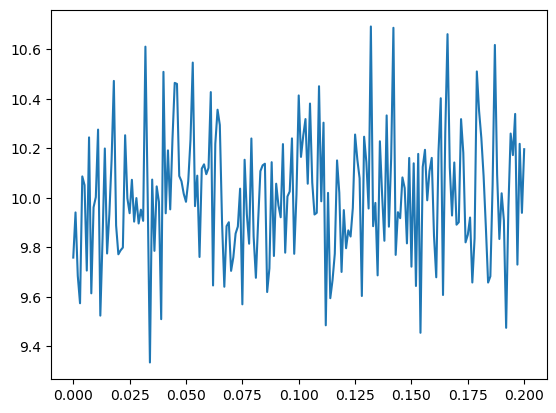

In [24]:
plt.plot(r_variabile, viriale_p)

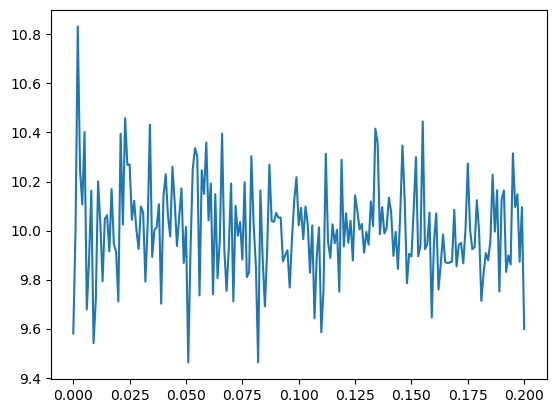

In [25]:
plt.plot(r_variabile, viriale_q)

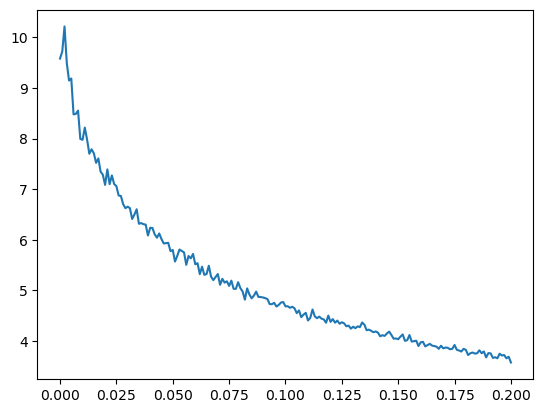

In [26]:
plt.plot(r_variabile, viriale_q_quadro)

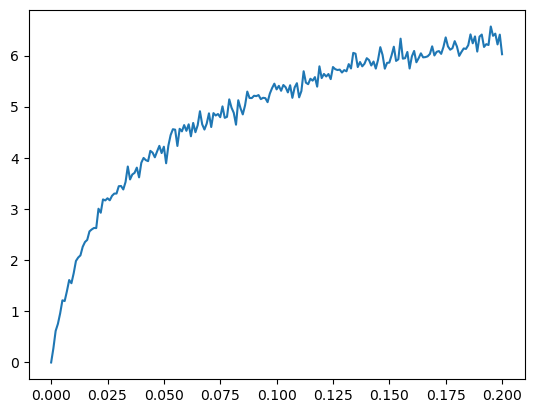

In [27]:
plt.plot(r_variabile, viriale_q_quarto)

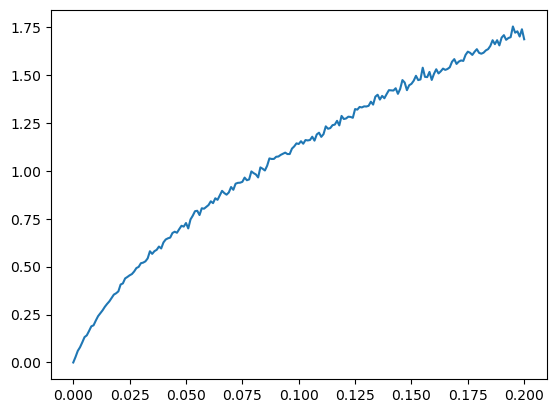

In [28]:
plt.plot(r_variabile, viriale_q_quarto/viriale_q_quadro)